In [9]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import joblib
import mglearn

import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))


Python version: 3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]
pandas version: 0.20.1
matplotlib version: 2.0.2
NumPy version: 1.12.1
SciPy version: 0.19.0
IPython version: 6.0.0
scikit-learn version: 0.18.1


In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))


Keys of iris_dataset: 
dict_keys(['feature_names', 'target', 'DESCR', 'data', 'target_names'])


In [5]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [7]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [8]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))


Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [10]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [11]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))


First five columns of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [12]:
print("Type of target: {}".format(type(iris_dataset['target'])))


Type of target: <class 'numpy.ndarray'>


In [13]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [14]:
print("Target:\n{}".format(iris_dataset['target']))


Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print("Shape of Train: {}, y: {}".format(X_train.shape, y_train.shape))
print("Shape of Test: {}, y: {}".format(X_test.shape, y_test.shape))

Shape of Train: (112, 4), y: (112,)
Shape of Test: (38, 4), y: (38,)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


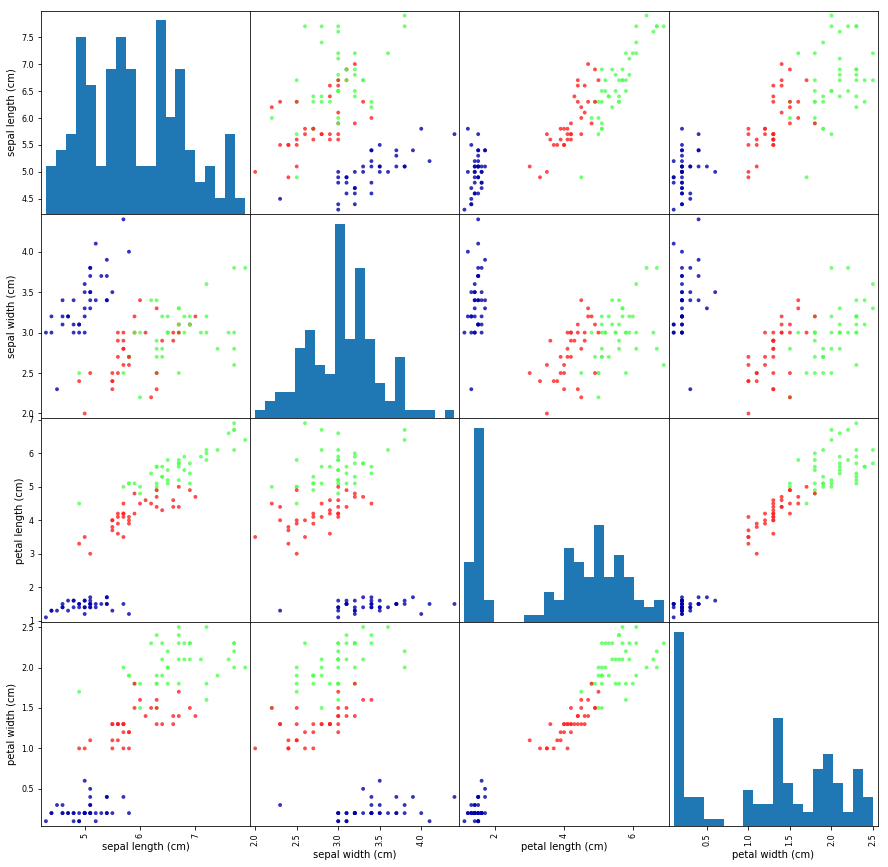

In [26]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import joblib
import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='.',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
# found a wild flower:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [30]:
# predict
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [31]:
#evaluate
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [32]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [33]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set score: 0.97


In [ ]:
# Summary and Outlook
# Let’s summarize what we learned in this chapter. We started with a brief introduction
# to machine learning and its applications, then discussed the distinction between
# supervised and unsupervised learning and gave an overview of the tools we’ll be
# using in this book. 
# Then, we formulated the task of predicting which species of iris a
# particular flower belongs to by using physical measurements of the flower. We used a
# dataset of measurements that was annotated by an expert with the correct species to
# build our model, making this a supervised learning task. 
# There were three possible
# species, setosa, versicolor, or virginica, which made the task a three-class classification
# problem. The possible species are called classes in the classification problem, and the
# species of a single iris is called its label.

# The Iris dataset consists of two NumPy arrays: one containing the data, which is
# referred to as X in scikit-learn, and one containing the correct or desired outputs,
# which is called y. The array X is a two-dimensional array of features, with one row per
# data point and one column per feature. The array y is a one-dimensional array, which
# here contains one class label, an integer ranging from 0 to 2, for each of the samples.
# We split our dataset into a training set, to build our model, and a test set, to evaluate
# how well our model will generalize to new, previously unseen data.

# We chose the k-nearest neighbors classification algorithm, which makes predictions
# for a new data point by considering its closest neighbor(s) in the training set. This is
# implemented in the KNeighborsClassifier class, which contains the algorithm that
# builds the model as well as the algorithm that makes a prediction using the model.
# We instantiated the class, setting parameters. 
# Then we built the model by calling the
# fit method, passing the training data (X_train) and training outputs (y_train) as
# parameters. We evaluated the model using the score method, which computes the
# accuracy of the model. We applied the score method to the test set data and the test
# set labels and found that our model is about 97% accurate, meaning it is correct 97%
# of the time on the test set.
# This gave us the confidence to apply the model to new data (in our example, new
# flower measurements) and trust that the model will be correct about 97% of the time.

# This snippet contains the core code for applying any machine learning algorithm
# using scikit-learn. The fit, predict, and score methods are the common inter‐
# face to supervised models in scikit-learn, and with the concepts introduced in this
# chapter, you can apply these models to many machine learning tasks. In the next
# chapter, we will go into more depth about the different kinds of supervised models in
# scikit-learn and how to apply them successfully.